In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

%matplotlib inline
df = pd.read_csv('data/ethylene_methane.txt', delim_whitespace=True, skiprows=[0], header=None)
df = df.rename(columns = {0:'Time (seconds)', 1:'CO2 conc (ppm)', 2:'Ethylene conc (ppm)', 3:'Sensor1',4:'Sensor2',5:'Sensor3',6:'Sensor4',7:'Sensor5',8:'Sensor6',9:'Sensor7',10:'Sensor8',11:'Sensor9',12:'Sensor10',13:'Sensor11',14:'Sensor12',15:'Sensor13',16:'Sensor14',17:'Sensor15',18:'Sensor16'})


In [2]:
df.head(100)

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
0,0.00,0.0,0.0,-41.98,2067.64,-37.13,2.28,8.63,-26.62,-8.46,-0.33,3437.73,2728.14,4054.03,4007.89,4478.27,5056.98,3639.09,3128.49
1,0.01,0.0,0.0,-46.50,2067.88,-28.56,13.69,-12.35,-25.81,-5.04,-5.04,3432.44,2734.47,4038.62,4019.40,4496.72,5051.81,3636.97,3115.03
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84
4,0.04,0.0,0.0,-37.30,2081.17,-36.16,3.26,5.05,-26.14,-7.48,-0.65,3436.85,2719.71,4029.64,4007.25,4499.12,5057.35,3674.30,3147.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.95,0.0,0.0,-41.98,2068.36,-8.94,31.51,18.43,0.65,19.90,34.46,3444.20,2737.64,4053.71,3994.49,4466.34,5066.95,3644.24,3138.31
96,0.96,0.0,0.0,-41.66,2065.75,-5.53,39.22,19.73,-5.21,16.30,35.12,3448.91,2736.85,4051.14,3997.04,4476.57,5059.56,3652.73,3148.15
97,0.97,0.0,0.0,-39.72,2069.30,-2.44,35.28,23.49,-1.79,22.84,29.71,3442.44,2741.87,4032.20,4004.70,4477.59,5066.58,3671.56,3123.72
98,0.98,0.0,0.0,-41.49,2051.31,0.16,34.62,22.84,-0.81,16.96,33.15,3449.79,2724.45,4035.73,4003.74,4481.00,5066.58,3650.00,3157.16


Text(0, 0.5, 'CO conc (ppm)')

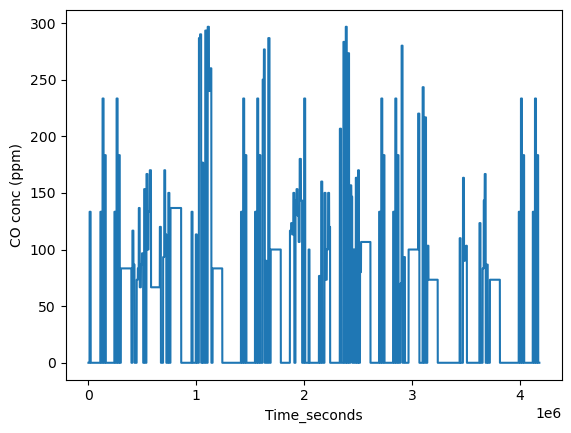

In [3]:
df['CO2 conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('CO conc (ppm)')

Text(0, 0.5, 'Ethylene conc (ppm)')

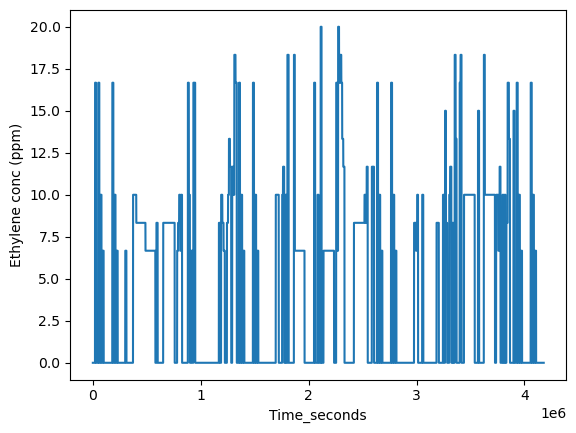

In [4]:
df['Ethylene conc (ppm)'].plot.line()
plt.xlabel('Time_seconds')
plt.ylabel('Ethylene conc (ppm)')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178504 entries, 0 to 4178503
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Time (seconds)       float64
 1   CO2 conc (ppm)       float64
 2   Ethylene conc (ppm)  float64
 3   Sensor1              float64
 4   Sensor2              float64
 5   Sensor3              float64
 6   Sensor4              float64
 7   Sensor5              float64
 8   Sensor6              float64
 9   Sensor7              float64
 10  Sensor8              float64
 11  Sensor9              float64
 12  Sensor10             float64
 13  Sensor11             float64
 14  Sensor12             float64
 15  Sensor13             float64
 16  Sensor14             float64
 17  Sensor15             float64
 18  Sensor16             float64
dtypes: float64(19)
memory usage: 605.7 MB


In [6]:
df.describe()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16
count,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06,4.178504e+06
mean,2.089566e+04,5.808503e+01,4.369478e+00,2.520157e+03,1.711449e+03,2.756596e+03,3.035848e+03,1.863258e+03,2.386329e+03,2.689914e+03,2.978962e+03,3.541804e+03,2.823842e+03,2.301598e+03,2.024606e+03,1.687490e+03,1.806279e+03,2.309401e+03,1.862996e+03
std,1.206404e+04,7.663941e+01,5.521296e+00,2.532045e+02,1.184762e+02,1.150495e+03,1.252085e+03,1.104965e+03,1.425092e+03,1.102780e+03,1.229724e+03,2.607058e+02,2.002925e+02,9.875315e+02,8.246309e+02,9.865598e+02,1.102382e+03,9.652522e+02,7.658043e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,-5.648000e+01,1.568880e+03,-4.778000e+01,-6.830000e+00,-1.268000e+01,-4.198000e+01,-1.528000e+01,-1.187000e+01,2.976530e+03,2.367650e+03,6.898700e+02,5.817900e+02,4.433000e+02,4.239800e+02,7.713900e+02,5.890900e+02
25%,1.044672e+04,0.000000e+00,0.000000e+00,2.335120e+03,1.639010e+03,1.581310e+03,1.750760e+03,8.197600e+02,1.061500e+03,1.533260e+03,1.660440e+03,3.344630e+03,2.672740e+03,1.409680e+03,1.201660e+03,7.593200e+02,7.685600e+02,1.424110e+03,1.113520e+03
50%,2.089672e+04,0.000000e+00,0.000000e+00,2.463490e+03,1.701300e+03,2.885640e+03,3.199850e+03,1.393180e+03,1.688830e+03,2.785620e+03,3.136350e+03,3.481370e+03,2.782960e+03,2.174530e+03,2.072150e+03,1.266570e+03,1.332660e+03,2.165370e+03,1.839750e+03
75%,3.134324e+04,1.000000e+02,8.330000e+00,2.676930e+03,1.754580e+03,3.798990e+03,4.172030e+03,2.813350e+03,3.605260e+03,3.610690e+03,4.083020e+03,3.708470e+03,2.943730e+03,3.140840e+03,2.701560e+03,2.543380e+03,2.746090e+03,3.123440e+03,2.506360e+03
max,4.179019e+04,2.966700e+02,2.000000e+01,3.402560e+03,9.825750e+03,5.567440e+03,6.127680e+03,4.420840e+03,5.707530e+03,5.304140e+03,5.820370e+03,4.436430e+03,3.519340e+03,4.849910e+03,4.062070e+03,4.540980e+03,5.108820e+03,4.699970e+03,3.764370e+03


Text(0, 0.5, 'Sensor Reading')

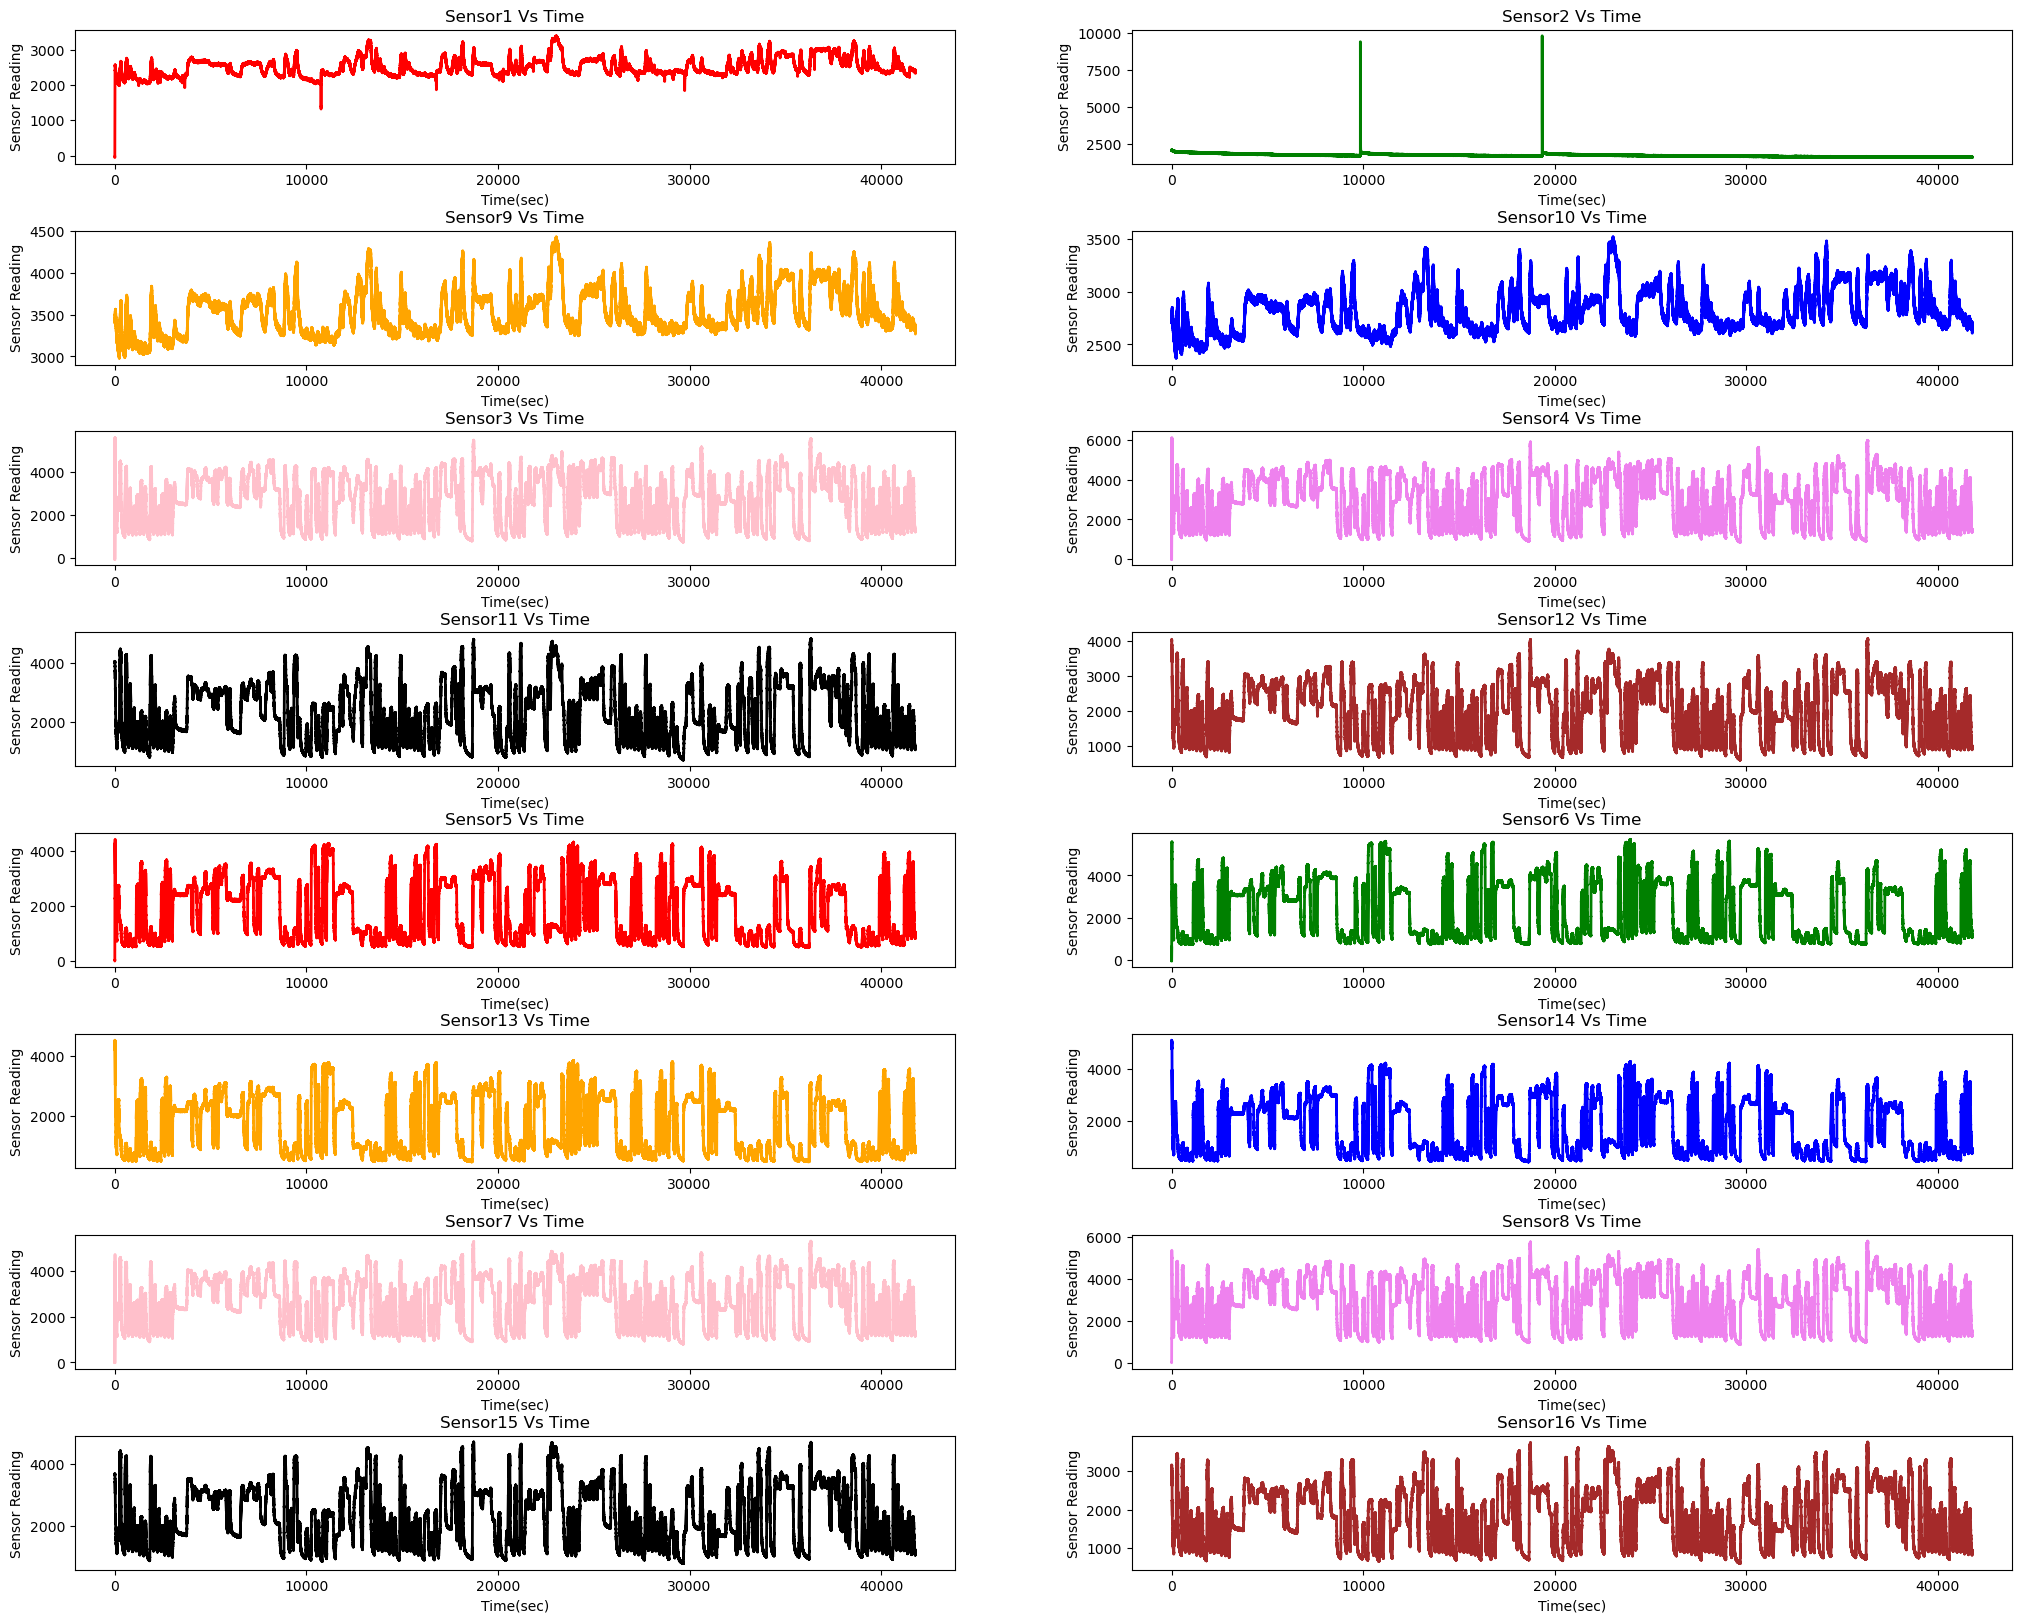

In [9]:
fig, axes = plt.subplots(nrows=8, ncols=2)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)


# TGS 2602 START #
axes[0,0].plot(df['Time (seconds)'], df['Sensor1'], c = 'red',linewidth = '2.0')
axes[0,0].set_title('Sensor1 Vs Time')
axes[0,0].set_xlabel('Time(sec)')
axes[0,0].set_ylabel('Sensor Reading')

axes[0,1].plot(df['Time (seconds)'], df['Sensor2'], c = 'green',linewidth = '2.0')
axes[0,1].set_title('Sensor2 Vs Time')
axes[0,1].set_xlabel('Time(sec)')
axes[0,1].set_ylabel('Sensor Reading')

axes[1,0].plot(df['Time (seconds)'], df['Sensor9'], c = 'orange',linewidth = '2.0')
axes[1,0].set_title('Sensor9 Vs Time')
axes[1,0].set_xlabel('Time(sec)')
axes[1,0].set_ylabel('Sensor Reading')

axes[1,1].plot(df['Time (seconds)'], df['Sensor10'], c = 'blue',linewidth = '2.0')
axes[1,1].set_title('Sensor10 Vs Time')
axes[1,1].set_xlabel('Time(sec)')
axes[1,1].set_ylabel('Sensor Reading')
# TGS 2602 END #

# TGS 2600 START #
axes[2,0].plot(df['Time (seconds)'], df['Sensor3'], c = 'pink',linewidth = '2.0')
axes[2,0].set_title('Sensor3 Vs Time')
axes[2,0].set_xlabel('Time(sec)')
axes[2,0].set_ylabel('Sensor Reading')

axes[2,1].plot(df['Time (seconds)'], df['Sensor4'], c = 'violet',linewidth = '2.0')
axes[2,1].set_title('Sensor4 Vs Time')
axes[2,1].set_xlabel('Time(sec)')
axes[2,1].set_ylabel('Sensor Reading')

axes[3,0].plot(df['Time (seconds)'], df['Sensor11'], c = 'black',linewidth = '2.0')
axes[3,0].set_title('Sensor11 Vs Time')
axes[3,0].set_xlabel('Time(sec)')
axes[3,0].set_ylabel('Sensor Reading')

axes[3,1].plot(df['Time (seconds)'], df['Sensor12'], c = 'brown',linewidth = '2.0')
axes[3,1].set_title('Sensor12 Vs Time')
axes[3,1].set_xlabel('Time(sec)')
axes[3,1].set_ylabel('Sensor Reading')

# TGS 2600 END #


# TGS 2610 START #
axes[4,0].plot(df['Time (seconds)'], df['Sensor5'], c = 'red',linewidth = '2.0')
axes[4,0].set_title('Sensor5 Vs Time')
axes[4,0].set_xlabel('Time(sec)')
axes[4,0].set_ylabel('Sensor Reading')

axes[4,1].plot(df['Time (seconds)'], df['Sensor6'], c = 'green',linewidth = '2.0')
axes[4,1].set_title('Sensor6 Vs Time')
axes[4,1].set_xlabel('Time(sec)')
axes[4,1].set_ylabel('Sensor Reading')

axes[5,0].plot(df['Time (seconds)'], df['Sensor13'], c = 'orange',linewidth = '2.0')
axes[5,0].set_title('Sensor13 Vs Time')
axes[5,0].set_xlabel('Time(sec)')
axes[5,0].set_ylabel('Sensor Reading')

axes[5,1].plot(df['Time (seconds)'], df['Sensor14'], c = 'blue',linewidth = '2.0')
axes[5,1].set_title('Sensor14 Vs Time')
axes[5,1].set_xlabel('Time(sec)')
axes[5,1].set_ylabel('Sensor Reading')
# TGS 2610 END #


# TGS 2620 START #
axes[6,0].plot(df['Time (seconds)'], df['Sensor7'], c = 'pink',linewidth = '2.0')
axes[6,0].set_title('Sensor7 Vs Time')
axes[6,0].set_xlabel('Time(sec)')
axes[6,0].set_ylabel('Sensor Reading')

axes[6,1].plot(df['Time (seconds)'], df['Sensor8'], c = 'violet',linewidth = '2.0')
axes[6,1].set_title('Sensor8 Vs Time')
axes[6,1].set_xlabel('Time(sec)')
axes[6,1].set_ylabel('Sensor Reading')

axes[7,0].plot(df['Time (seconds)'], df['Sensor15'], c = 'black',linewidth = '2.0')
axes[7,0].set_title('Sensor15 Vs Time')
axes[7,0].set_xlabel('Time(sec)')
axes[7,0].set_ylabel('Sensor Reading')

axes[7,1].plot(df['Time (seconds)'], df['Sensor16'], c = 'brown',linewidth = '2.0')
axes[7,1].set_title('Sensor16 Vs Time')
axes[7,1].set_xlabel('Time(sec)')
axes[7,1].set_ylabel('Sensor Reading')
# TGS 2620 END #

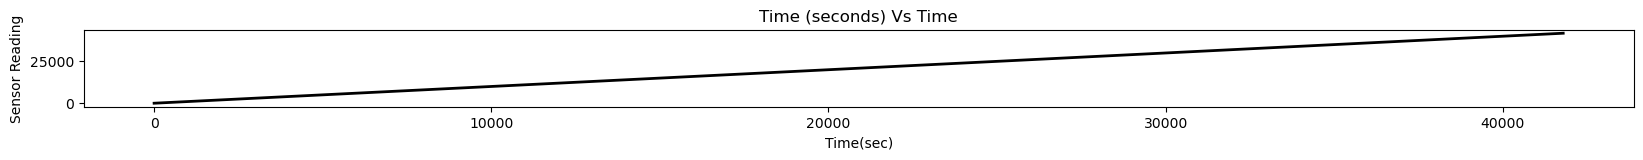

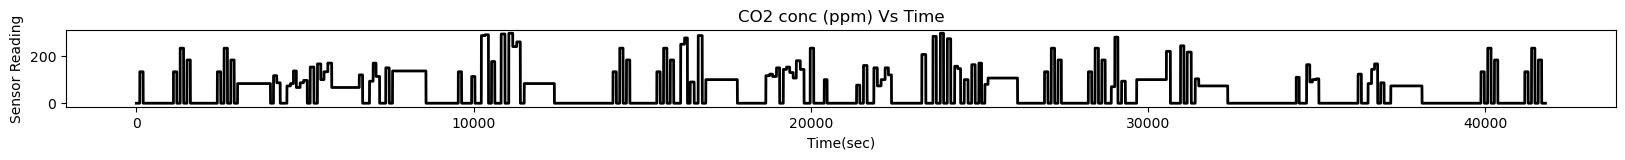

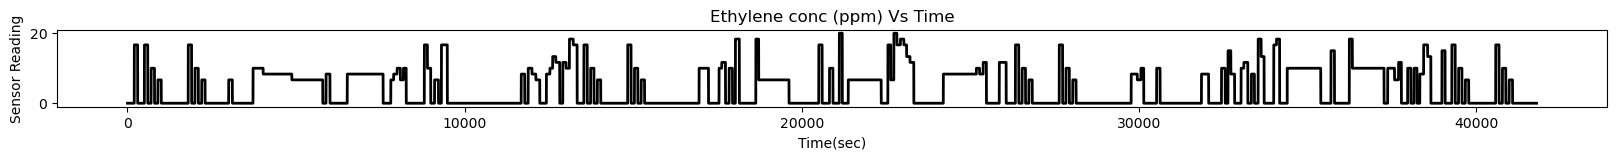

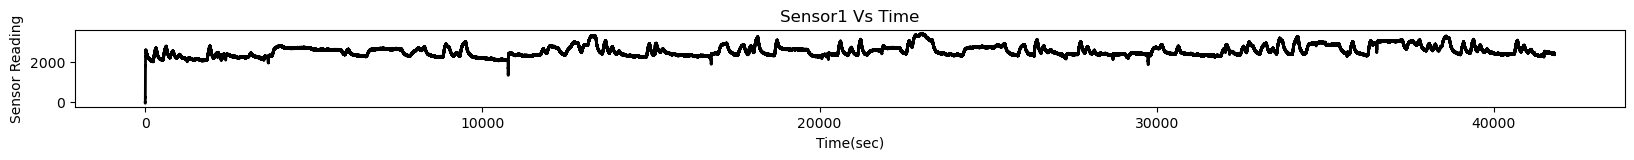

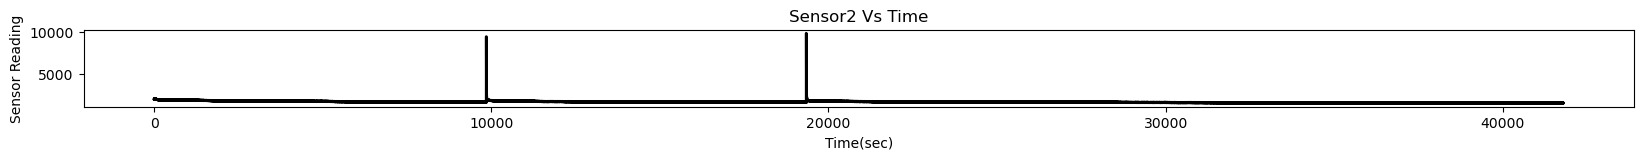

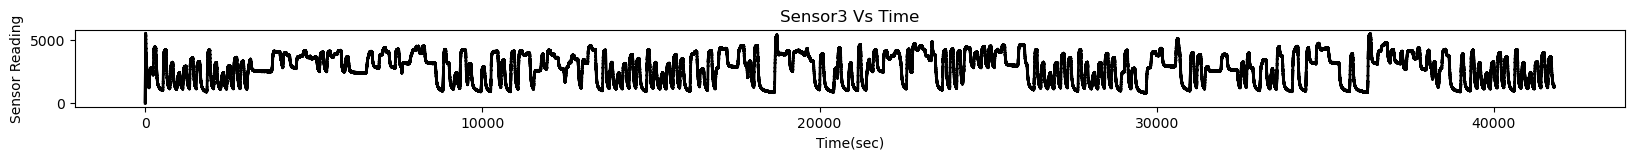

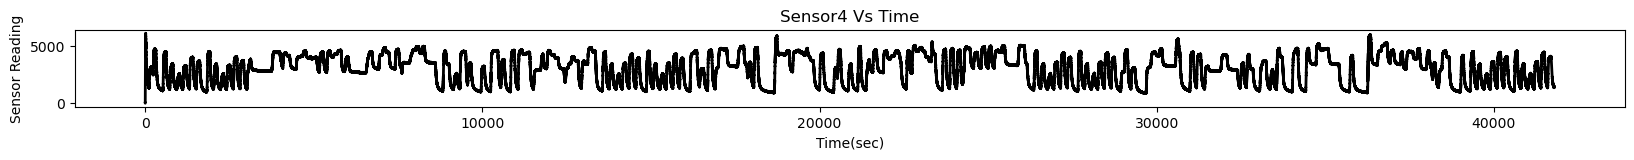

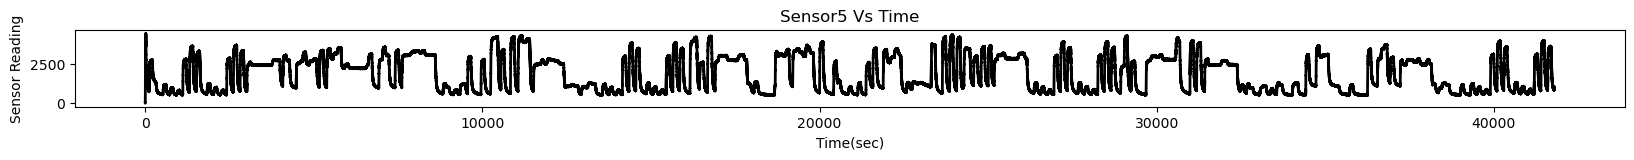

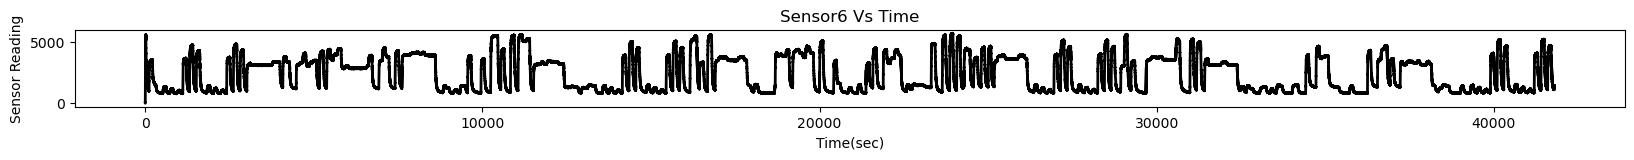

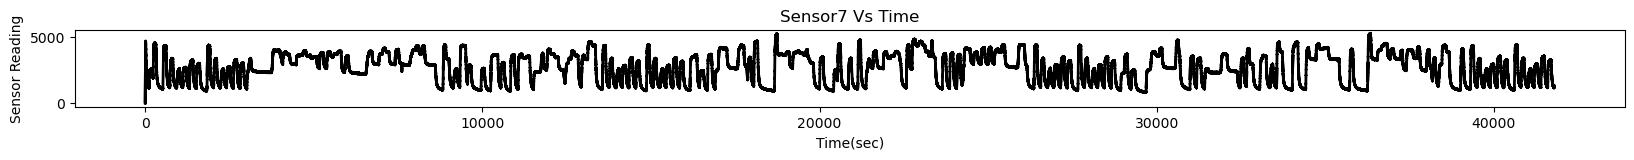

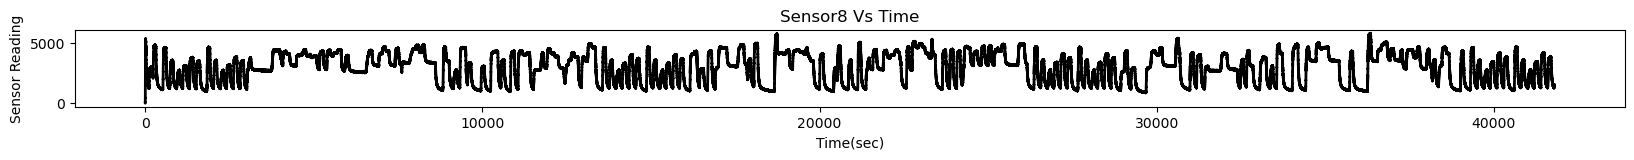

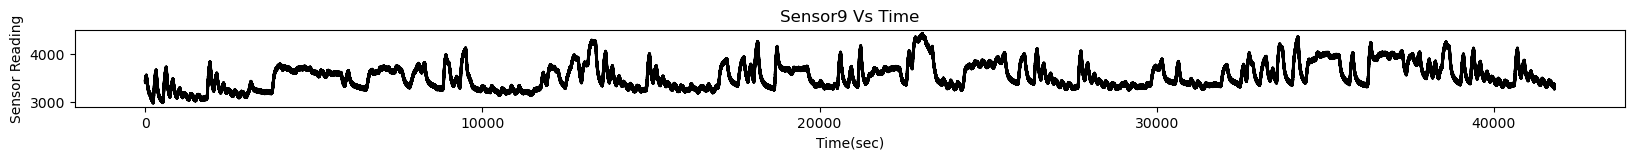

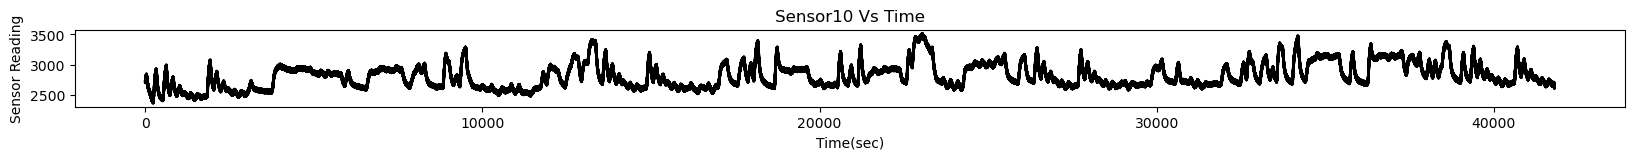

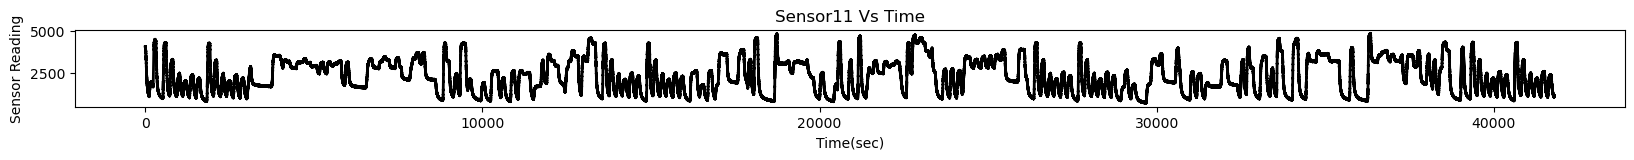

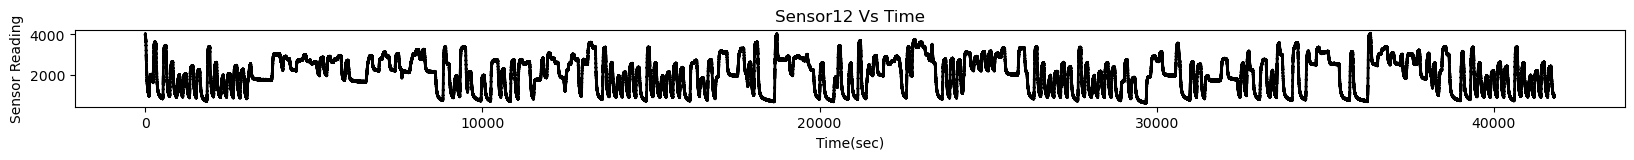

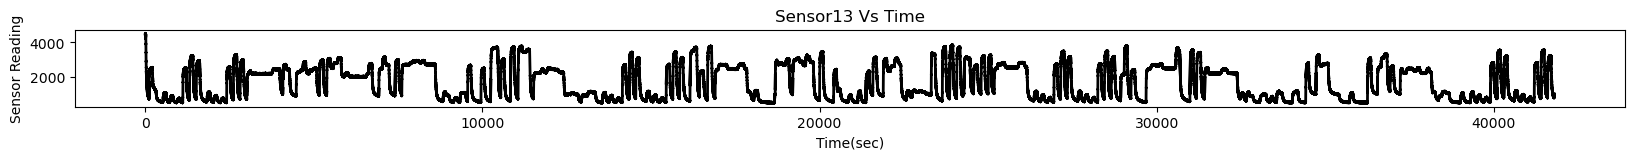

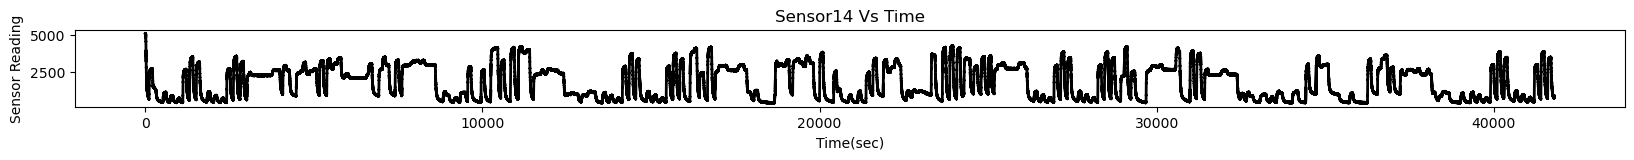

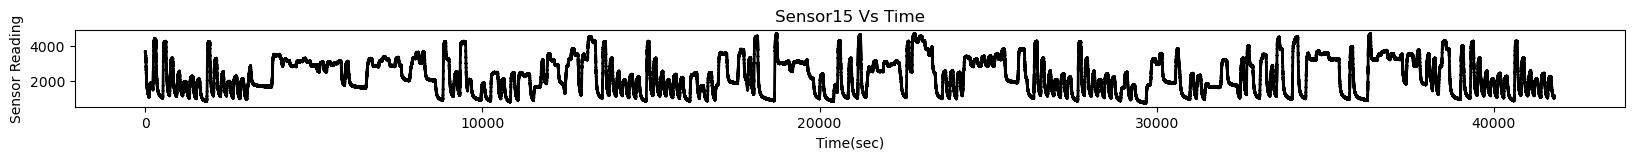

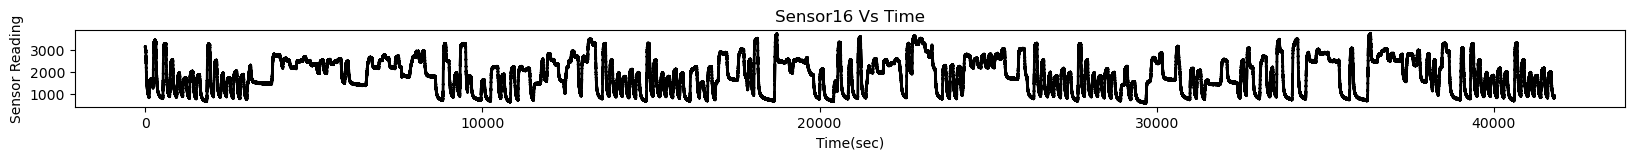

In [8]:
for sensor in df:
    plt.figure(figsize=(20,1))
    plt.plot(df['Time (seconds)'], df[sensor], c = 'black' , linewidth = '2.0')
    plt.title(sensor + ' Vs Time')
    plt.xlabel('Time(sec)')
    plt.ylabel('Sensor Reading')
    plt.show()


In [10]:
y=[]
for i in range(df.shape[0]):
    y.append(i)
    if(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 0
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] == 0):
        y[i] = 1
    elif(df['CO2 conc (ppm)'][i] == 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 2
    elif(df['CO2 conc (ppm)'][i] != 0 and df['Ethylene conc (ppm)'][i] != 0):
        y[i] = 3
    else:
        y[i] = 4

In [11]:
print(np.min(y), np.max(y))

0 3


In [12]:
df['Response']=y
df['Response'].value_counts()

0    1374390
1    1001154
2     954362
3     848598
Name: Response, dtype: int64

In [13]:
df.corr()

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),1.000000,-0.119521,0.034422,0.325893,-0.619647,-0.049409,-0.055903,-0.111002,-0.105951,-0.036904,-0.046773,0.331957,0.342541,-0.001777,-0.042225,-0.107975,-0.111157,0.001696,-0.013905,-0.072662
CO2 conc (ppm),-0.119521,1.000000,-0.143226,-0.144040,0.067951,0.394419,0.418509,0.737518,0.757718,0.340571,0.408273,-0.108314,-0.136624,0.121874,0.293431,0.745570,0.741205,0.121893,0.210210,0.317211
Ethylene conc (ppm),0.034422,-0.143226,1.000000,0.523701,-0.053148,0.430955,0.405503,-0.027998,-0.063897,0.527484,0.479482,0.531018,0.519955,0.599878,0.517674,-0.032137,-0.023921,0.652596,0.612186,0.767090
Sensor1,0.325893,-0.144040,0.523701,1.000000,-0.265457,0.542035,0.517309,-0.007997,-0.049581,0.607853,0.550246,0.968722,0.969346,0.753019,0.630892,-0.016571,-0.006873,0.745483,0.695299,0.420308
Sensor2,-0.619647,0.067951,-0.053148,-0.265457,1.000000,-0.005251,-0.001264,0.046230,0.046176,-0.015265,-0.008755,-0.264761,-0.269184,-0.034037,-0.008078,0.046804,0.048559,-0.037632,-0.027482,-0.005678
Sensor3,-0.049409,0.394419,0.430955,0.542035,-0.005251,1.000000,0.999062,0.731055,0.691825,0.982586,0.989380,0.594828,0.549763,0.914206,0.983286,0.721525,0.732392,0.894333,0.937476,0.597247
Sensor4,-0.055903,0.418509,0.405503,0.517309,-0.001264,0.999062,1.000000,0.757826,0.719986,0.975786,0.986610,0.571084,0.524924,0.897211,0.975473,0.748405,0.758851,0.875470,0.923054,0.589411
Sensor5,-0.111002,0.737518,-0.027998,-0.007997,0.046230,0.731055,0.757826,1.000000,0.997572,0.639524,0.712419,0.049530,-0.003966,0.402772,0.607913,0.998335,0.998563,0.377419,0.483027,0.395684
Sensor6,-0.105951,0.757718,-0.063897,-0.049581,0.046176,0.691825,0.719986,0.997572,1.000000,0.598874,0.675369,0.007560,-0.044395,0.352848,0.564077,0.997141,0.996410,0.329066,0.437546,0.365736
Sensor7,-0.036904,0.340571,0.527484,0.607853,-0.015265,0.982586,0.975786,0.639524,0.598874,1.000000,0.994842,0.655800,0.616637,0.951181,0.993048,0.631561,0.642433,0.951269,0.980856,0.643897


In [14]:
df.corr() > 0.9

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
Time (seconds),True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
CO2 conc (ppm),False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Ethylene conc (ppm),False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor1,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False
Sensor2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Sensor3,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,False,True,False
Sensor4,False,False,False,False,False,True,True,False,False,True,True,False,False,False,True,False,False,False,True,False
Sensor5,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False
Sensor6,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False
Sensor7,False,False,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True,True,False


In [15]:
x=df[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y=df[['Response']]


/var/folders/vw/vprwv39n2lzb5np1m4qgf3c00000gn/T/ipykernel_29880/573097040.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_fs)


[0.04669762 0.03110264 0.04876876 0.0504389  0.09183107 0.09806785
 0.06137647 0.06161172 0.04511339 0.04640591 0.0625812  0.04702427
 0.07830947 0.09004213 0.07787267 0.06275594]


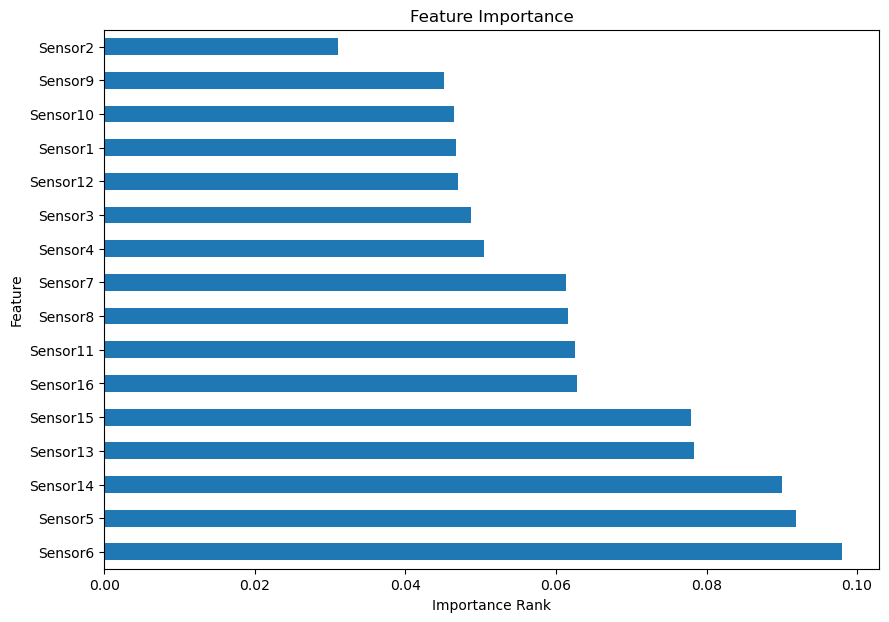

In [16]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

y_fs = y.astype('int64')
plt.figure(figsize=(10,7))
model = ExtraTreesClassifier()
model.fit(x,y_fs)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')

plt.xlabel('Importance Rank')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()



# Remove Outliers

In [17]:
from scipy import stats
z=stats.zscore(df)

df_clean = df[(z < 3).all(axis=1)]

In [18]:
df_clean

,Time (seconds),CO2 conc (ppm),Ethylene conc (ppm),Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Sensor11,Sensor12,Sensor13,Sensor14,Sensor15,Sensor16,Response
2,0.02,0.0,0.0,-36.16,2055.81,-10.89,8.63,-2.93,-30.34,-9.27,-2.12,3438.61,2719.97,4030.92,4025.48,4489.54,5057.35,3641.81,3105.24,0
3,0.03,0.0,0.0,-50.36,2053.68,-31.96,-0.65,-8.29,-21.60,7.98,2.28,3429.51,2720.50,4040.22,4000.87,4485.44,5049.60,3642.72,3124.84,0
5,0.05,0.0,0.0,-48.43,2058.64,-32.61,18.59,9.61,-28.89,-12.19,0.65,3463.35,2748.74,4037.97,4023.88,4486.47,5058.09,3650.60,3111.96,0
6,0.06,0.0,0.0,-46.17,2065.99,-33.74,7.82,-2.12,-38.10,10.59,2.93,3426.87,2731.83,4027.72,3996.72,4507.33,5056.61,3644.54,3122.32,0
8,0.08,0.0,0.0,-40.85,2061.72,-34.87,3.42,-0.65,-30.99,-8.94,-0.33,3432.15,2741.34,4054.67,4003.42,4509.39,5079.15,3666.39,3135.78,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4178499,41790.15,0.0,0.0,2348.01,1599.24,1329.94,1488.62,1031.11,1431.76,1335.58,1506.05,3300.43,2634.70,1156.91,975.15,972.41,929.27,1211.47,948.94,0
4178500,41790.16,0.0,0.0,2341.81,1605.37,1333.28,1479.61,1022.80,1421.56,1336.00,1500.45,3277.72,2640.67,1155.49,975.15,963.60,938.42,1222.74,937.25,0
4178501,41790.17,0.0,0.0,2345.78,1604.06,1337.47,1475.10,1022.61,1423.68,1345.63,1504.76,3299.56,2622.24,1153.47,964.18,978.68,949.92,1204.32,921.50,0
4178502,41790.18,0.0,0.0,2350.25,1594.86,1323.68,1492.49,1041.03,1434.53,1338.72,1508.85,3296.69,2640.15,1150.03,971.04,976.92,940.76,1212.09,946.99,0


In [19]:
x_clean=df_clean[[u'Sensor1', u'Sensor2', u'Sensor3', u'Sensor4', u'Sensor5', u'Sensor6', u'Sensor7', u'Sensor8', u'Sensor9', u'Sensor10', u'Sensor11', u'Sensor12', u'Sensor13' , u'Sensor14', u'Sensor15', u'Sensor16']]
y_clean=df_clean[['Response']]

xtrain_c, xtest_c = x_clean[:int(len(x_clean) * 0.80)], x_clean[int(len(x_clean) * 0.80):] 
ytrain_c, ytest_c = y_clean[:int(len(y_clean) * 0.80)], y_clean[int(len(y_clean) * 0.80):] 

ytrain_c = ytrain_c.astype('int64')
ytest_c = ytest_c.astype('int64')


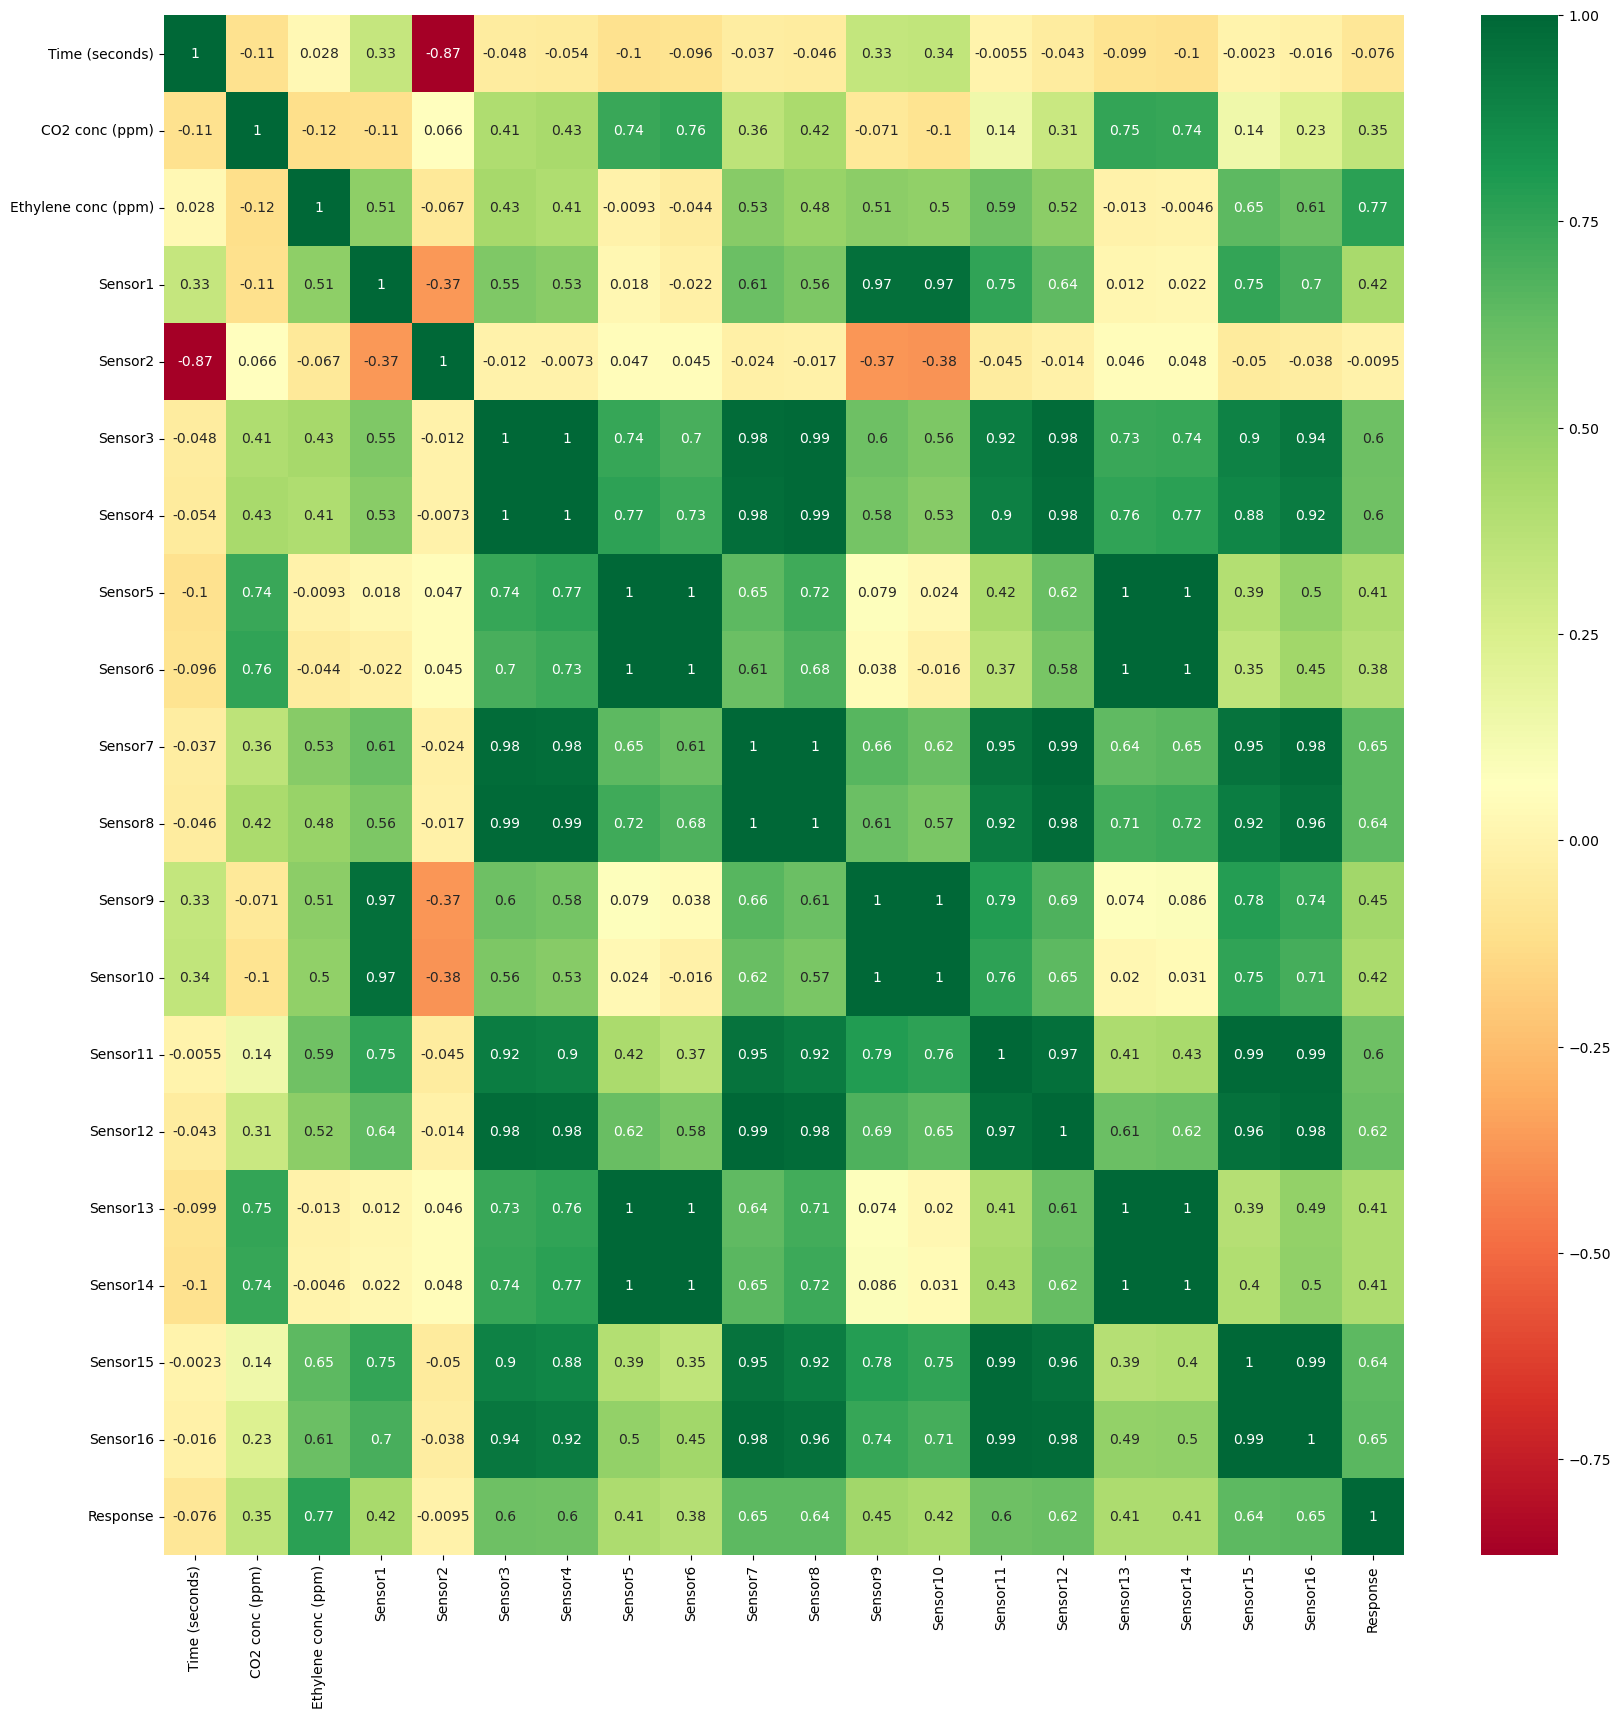

In [20]:
import seaborn as sns


#get correlations of each features in dataset
corrmat = df_clean.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df_clean[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [20]:
df['Response'].value_counts()

0    1249996
2    1201509
3     966564
1     790192
Name: Response, dtype: int64

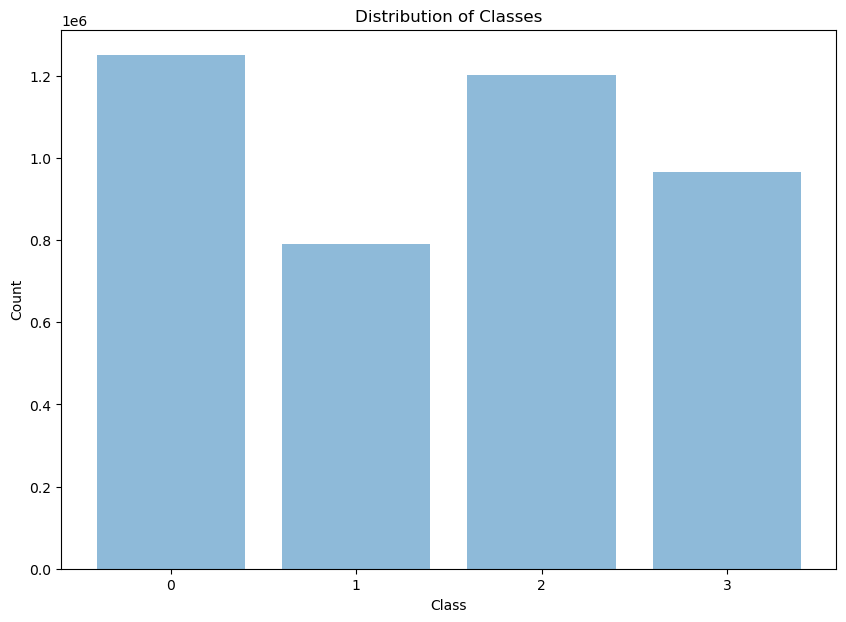

In [21]:
import matplotlib.pyplot as plt
x=[0, 1, 2, 3]
y=[1249996, 790192, 1201509, 966564]


classes = ('0', '1', '2', '3')
plt.figure(figsize=(10,7))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, classes)
plt.ylabel('Count')
plt.xlabel('Class')
plt.title('Distribution of Classes')

plt.show()